In [59]:
import numpy as np

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

from sklearn import linear_model
clf = linear_model.LogisticRegression()


from sklearn.model_selection import StratifiedShuffleSplit
ss = StratifiedShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

print(np.unique(y,       return_counts=True)) # return_counts=Trueとすると、重複している回数を返す。
print(np.unique(y,       return_counts=True)[1] / y.size)
print(np.unique(y_train, return_counts=True)[1] / y_train.size)
print(np.unique(y_test,  return_counts=True)[1] / y_test.size)

(array([0, 1]), array([212, 357]))
[ 0.37258348  0.62741652]
[ 0.37362637  0.62637363]
[ 0.36842105  0.63157895]


In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, 
                         X_train, y_train, 
                         cv=10) # StratifiedKFold(10-Fold cross validation)   引数のデータに訓練データを渡す。　検証データを用いてモデルを評価

In [62]:
scores.mean()

0.94932367149758456

In [63]:
C_range_exp = np.linspace(start=-15, stop=20, num=36)
C_range = 10 ** C_range_exp
C_range

array([  1.00000000e-15,   1.00000000e-14,   1.00000000e-13,
         1.00000000e-12,   1.00000000e-11,   1.00000000e-10,
         1.00000000e-09,   1.00000000e-08,   1.00000000e-07,
         1.00000000e-06,   1.00000000e-05,   1.00000000e-04,
         1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03,   1.00000000e+04,   1.00000000e+05,
         1.00000000e+06,   1.00000000e+07,   1.00000000e+08,
         1.00000000e+09,   1.00000000e+10,   1.00000000e+11,
         1.00000000e+12,   1.00000000e+13,   1.00000000e+14,
         1.00000000e+15,   1.00000000e+16,   1.00000000e+17,
         1.00000000e+18,   1.00000000e+19,   1.00000000e+20])

In [64]:
all_scores_mean = []
all_scores_std  = []

for C in C_range:
    clf.C = C
    scores = cross_val_score(clf, 
                             X_train, y_train,
                             cv=10) # StratifiedKFold
    
    all_scores_mean.append(scores.mean())
    all_scores_std.append(scores.std())

In [65]:
all_scores_mean = np.array(all_scores_mean)
all_scores_std  = np.array(all_scores_std)

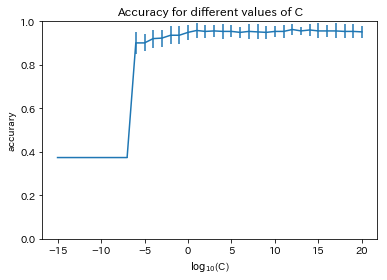

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.plot(C_range_exp, all_scores_mean)

plt.errorbar(C_range_exp, 
             all_scores_mean, 
             yerr=all_scores_std)

plt.ylim(0,1)
plt.ylabel('accurary')
plt.xlabel('$\log_{10}$(C)')
plt.title('Accuracy for different values of C')

In [11]:
all_scores_mean.max()

0.96260869565217388

In [12]:
max_index = np.argmax(all_scores_mean)

In [13]:
C_range_exp[max_index]

12.0

In [14]:
clf.C = 10 ** C_range_exp[max_index]

In [15]:
clf.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [16]:
clf.score(X_test, y_test)

0.95614035087719296

In [17]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.94736842105263153

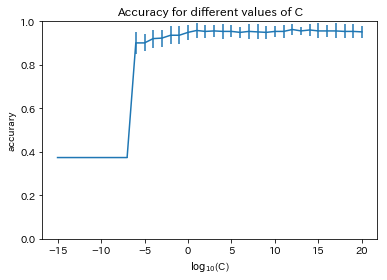

In [18]:
all_scores_mean = []
all_scores_std  = []

for C in C_range:
    clf = linear_model.LogisticRegression(C=C)
    scores = cross_val_score(clf, 
                             X_train, y_train,
                             cv=10) # Stratified 10-Fold 
    
    all_scores_mean.append(scores.mean())
    all_scores_std.append(scores.std())

all_scores_mean = np.array(all_scores_mean)
all_scores_std  = np.array(all_scores_std)

#plt.plot(C_range_exp, all_scores_mean)

plt.errorbar(C_range_exp, 
             all_scores_mean, 
             yerr=all_scores_std)

plt.ylim(0,1)
plt.ylabel('accurary')
plt.xlabel('$\log_{10}$(C)')
plt.title('Accuracy for different values of C')

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

In [10]:
X = data.data
y = data.target
from sklearn.model_selection import StratifiedShuffleSplit
ss = StratifiedShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [11]:
X_train.shape, y_train.shape

((455, 30), (455,))

In [75]:
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [86]:
scores_mean = []
scores_std = []
for k in range(1, 30):
    score = []
    for train_index, test_index in skf.split(X_train, y_train):
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train[train_index], y_train[train_index])
        score.append(clf.score(X_train[test_index], y_train[test_index]))
    score = np.array(score)
    scores_mean.append(score.mean())
    scores_std.append(score.std())

<Container object of 3 artists>

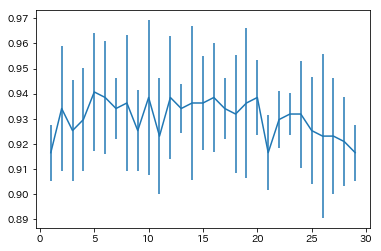

In [87]:
#plt.plot(np.arange(1, 30, 1), scores)
plt.errorbar(range(1, 30), scores_mean, yerr=scores_std)

In [90]:
scores_mean = np.array(scores_mean)
np.max(scores_mean)

0.94065934065934065

In [92]:
k = np.argmax(scores_mean)
clf.n_neighbors = k+1
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.91228070175438591

In [82]:
clf.n_neighbors = 1
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.91228070175438591

In [46]:
np.arange(1, 300, 1)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18